# Affect of Marijuana legalization on crime rates

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*

Evaluate the impact of marijuana legalization on other areas of crime through comparative analysis to establish/refute correlation.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
Does marijuana legalization lead to an increase in other areas of criminality?

## What would an answer look like?
*What is your hypothesized answer to your question?*
I suspect there will be some increases in other areas such as impaired driving. I do not have a strong inclination towards the degree it is impacted.

## Data Sources
*What 3 data sources have you identified for this project?*
[Seattle Crime stats](https://www.kaggle.com/datasets/city-of-seattle/seattle-crime-stats)
[Denver Crime stats](https://www.kaggle.com/datasets/paultimothymooney/denver-crime-data/data)
[Kansas City Crime](https://www.kaggle.com/datasets/riteshkadakoti/crime-dataset-kansas)

*How are you going to relate these datasets?*
My working plan to compare 2 large cities where marijuana was first legalized (2012) for recreational use. I plan compare pre and post legalization crime trends. Then further compare/contrast that with a large city that had not (until this year) legalized recreational use. I am still ruminating on the mechanics of how to best do that.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [50]:
# Start your code here
# Not sure what the expectation is for this block
import numpy as np
import pandas as pd
import datetime
from scipy.stats import trim_mean

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

import os

# Scikit Learn imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# denver_crime_df = pd.read_csv('data/denver_crime.csv') # old data
kc_crime_df = pd.read_csv('data/KCcrime2010To2018.csv', low_memory=False)
seattle01_crime_df = pd.read_csv('data/seattle-crime-stats-by-1990-census-tract-1996-2007.csv')
seattle02_crime_df = pd.read_csv('data/seattle-crime-stats-by-police-precinct-2008-present.csv')

denver_df_2010 = pd.read_csv('data/denver_by_year/crime2010.csv')
denver_df_2011 = pd.read_csv('data/denver_by_year/crime2011.csv')
denver_df_2012 = pd.read_csv('data/denver_by_year/crime2012.csv')
denver_df_2013 = pd.read_csv('data/denver_by_year/crime2013.csv')
denver_df_2014 = pd.read_csv('data/denver_by_year/crime2014.csv')
denver_df_2015 = pd.read_csv('data/denver_by_year/crime2015.csv')

denver_crime_df = pd.concat([denver_df_2010, denver_df_2011, denver_df_2012, denver_df_2013, denver_df_2014, denver_df_2015])

display(denver_crime_df.head())
display(kc_crime_df.head())
display(seattle01_crime_df.head())
display(seattle02_crime_df.head())



,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2010462648,2010462648299900,2999,0,criminal-mischief-other,public-disorder,9/14/2010 10:20:00 PM,NaN,9/14/2010 11:03:00 PM,919 N SANTA FE DR,3140951.0,1691506.0,-104.998854,39.730920,1,123,lincoln-park,1,0,1
1,2010496959,2010496959299900,2999,0,criminal-mischief-other,public-disorder,8/1/2010 12:00:00 PM,10/3/2010 9:00:00 AM,10/4/2010 1:41:00 PM,1245 S BELLAIRE ST,3158137.0,1678336.0,-104.938040,39.694490,3,322,virginia-village,1,0,1
2,2010556356,2010556356299900,2999,0,criminal-mischief-other,public-disorder,11/8/2010 12:00:00 AM,11/8/2010 12:14:00 AM,11/8/2010 12:14:00 AM,852 S JASON ST,3141261.0,1680686.0,-104.997964,39.701212,4,412,athmar-park,1,0,1
3,2010497257,2010497257299900,2999,0,criminal-mischief-other,public-disorder,9/30/2010 8:00:00 AM,10/2/2010 5:00:00 PM,10/4/2010 2:47:00 PM,3230 ARAPAHOE ST,3147444.0,1703264.0,-104.975527,39.763097,2,211,five-points,1,0,1
4,201072374,201072374299900,2999,0,criminal-mischief-other,public-disorder,2/13/2010 1:00:00 AM,2/13/2010 4:10:00 AM,2/13/2010 4:52:00 AM,200 16TH ST,3143897.0,1695450.0,-104.988300,39.741702,6,611,cbd,1,0,1


,140092859,2014,12,28,19,36,2014.1,12.1,22,1,...,64127,PJ2499,EPD,U,1.1,VIC,B,M,45,N
0,140003100,2014,1,14,12,30,2014,1,12,19,...,64106,PJ0407,CPD,U,1,VIC,B,F,20,N
1,140078116,2014,10,28,12,53,2014,10,7,14,...,64109,PJ0585,EPD,U,1,VIC,W,F,43,N
2,140087038,2014,12,4,12,35,2014,12,4,12,...,64130,PJ5992,MPD,U,1,VIC,B,M,20,Y
3,140034949,2014,5,22,12,23,2014,5,22,12,...,64127,PJ1548,EPD,U,1,VIC,U,U,37,Y
4,140067161,2014,9,18,11,10,2014,9,18,11,...,64124,PJ1735,EPD,U,1,SUS,U,U,37,N


,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


### Exploratory Data Analysis

Data visualizations to evaluate the data in order to form conclusions about whether marijuana legalization had a tangential impact on other aspects of crime.
I am paying particular attention to the 2-3 year period before and after legalization.

In [51]:
# Get the shapes of the data
display(denver_crime_df.shape)
display(seattle01_crime_df.shape)
display(seattle02_crime_df.shape)
display(kc_crime_df.shape)

(295178, 20)

(14268, 4)

(27125, 8)

(621281, 27)

In [52]:
# Look at the columns and compare the presentation of the data
display(denver_crime_df.info())
display(seattle01_crime_df.info())
display(seattle02_crime_df.info())
display(kc_crime_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 295178 entries, 0 to 61384
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             295178 non-null  int64  
 1   offense_id              295178 non-null  int64  
 2   OFFENSE_CODE            295178 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  295178 non-null  int64  
 4   OFFENSE_TYPE_ID         295178 non-null  object 
 5   OFFENSE_CATEGORY_ID     295178 non-null  object 
 6   FIRST_OCCURRENCE_DATE   295178 non-null  object 
 7   LAST_OCCURRENCE_DATE    191166 non-null  object 
 8   REPORTED_DATE           295178 non-null  object 
 9   INCIDENT_ADDRESS        290666 non-null  object 
 10  GEO_X                   290666 non-null  float64
 11  GEO_Y                   290666 non-null  float64
 12  GEO_LON                 290666 non-null  float64
 13  GEO_LAT                 290666 non-null  float64
 14  DISTRICT_ID             29

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268 entries, 0 to 14267
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Report_Year        14268 non-null  int64  
 1   Census_Tract_1990  14236 non-null  float64
 2   Crime_Type         14268 non-null  object 
 3   Report_Year_Total  14268 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 446.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27125 entries, 0 to 27124
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Police Beat        27125 non-null  object
 1   CRIME_TYPE         27125 non-null  object
 2   CRIME_DESCRIPTION  27125 non-null  object
 3   STAT_VALUE         27125 non-null  int64 
 4   REPORT_DATE        27125 non-null  object
 5   Sector             27125 non-null  object
 6   Precinct           27125 non-null  object
 7   Row_Value_ID       27125 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621281 entries, 0 to 621280
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   140092859             621281 non-null  int64 
 1   2014                  621281 non-null  int64 
 2   12                    621281 non-null  int64 
 3   28                    621281 non-null  int64 
 4   19                    621281 non-null  int64 
 5   36                    621281 non-null  int64 
 6   2014.1                621281 non-null  int64 
 7   12.1                  621281 non-null  int64 
 8   22                    621281 non-null  int64 
 9   1                     621281 non-null  int64 
 10  0                     621281 non-null  int64 
 11  670                   621281 non-null  int64 
 12  23D                   621281 non-null  object
 13  Stealing from Buildi  621281 non-null  object
 14  331                   621281 non-null  object
 15  3300  E 30 ST    

None

### Intitial thoughts
The data from Seattle 01 and Kansas City do not appear to provide much in the way of usable data. Denver and Seattle 02 show some promise. The datasets are structured differently but I may be able to extract the necessary data from them to answer the question I am researching. I will need to try to find another comparison city for evaluation against the cities with legalized marijuana.

In [53]:
# Check for duplicated records for Denver
denver_crime_df.duplicated().sum()


0

In [54]:
# Check for duplicated records for Seattle
seattle02_crime_df.duplicated().sum()

4

In [55]:
# Drop duplicates from Seattle and rename
display(seattle02_crime_df.shape)
seattle_crime_df = seattle02_crime_df.drop_duplicates()
display(seattle_crime_df.shape)

(27125, 8)

(27121, 8)

In [56]:
# Check for missing values for Denver
display(denver_crime_df.isna().sum())
display(seattle_crime_df.isna().sum())

incident_id                    0
offense_id                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      104012
REPORTED_DATE                  0
INCIDENT_ADDRESS            4512
GEO_X                       4512
GEO_Y                       4512
GEO_LON                     4512
GEO_LAT                     4512
DISTRICT_ID                 1416
PRECINCT_ID                    0
NEIGHBORHOOD_ID             4200
IS_CRIME                       0
IS_TRAFFIC                     0
VICTIM_COUNT                   0
dtype: int64

Police Beat          0
CRIME_TYPE           0
CRIME_DESCRIPTION    0
STAT_VALUE           0
REPORT_DATE          0
Sector               0
Precinct             0
Row_Value_ID         0
dtype: int64

### Data cleaned and ready for use
The missing values are immaterial to the scope of analysis and can be safely ignored. The four duplicates from Seattle have been dropped.

### Statistical Summary of the Data
Below is the statistical summary of the data for Denver and Seattle.

In [57]:
denver_crime_df.describe()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,PRECINCT_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
count,2.951780e+05,2.951780e+05,295178.000000,295178.000000,2.906660e+05,2.906660e+05,290666.000000,290666.000000,295178.000000,295178.0,295178.0,295178.000000
mean,5.191596e+09,5.191596e+15,2798.566523,0.298261,3.110883e+06,1.670257e+06,-105.097306,39.665595,371.787911,1.0,0.0,1.018389
std,9.007032e+09,9.007032e+15,1290.177171,0.666568,3.863004e+05,1.938725e+05,1.256304,0.595126,183.413675,0.0,0.0,0.208420
min,2.011500e+04,2.011513e+10,399.000000,0.000000,-1.000000e+00,-1.000000e+00,-115.464066,0.000001,111.000000,1.0,0.0,1.000000
25%,2.011369e+09,2.011369e+15,2204.000000,0.000000,3.137036e+06,1.681273e+06,-105.012717,39.702698,221.000000,1.0,0.0,1.000000
50%,2.013574e+09,2.013574e+15,2399.000000,0.000000,3.145226e+06,1.694369e+06,-104.983634,39.738676,323.000000,1.0,0.0,1.000000
75%,2.015486e+09,2.015486e+15,2999.000000,0.000000,3.159177e+06,1.700803e+06,-104.934136,39.756353,521.000000,1.0,0.0,1.000000
max,2.014150e+12,2.014150e+18,7399.000000,5.000000,4.067476e+07,1.089045e+07,-0.000002,39.936112,999.000000,1.0,0.0,27.000000


In [58]:
seattle_crime_df.describe()

,STAT_VALUE,Row_Value_ID
count,27121.000000,27121.000000
mean,8.414255,13804.621843
std,14.047802,7993.476080
min,-3.000000,1.000000
25%,0.000000,6907.000000
50%,3.000000,13806.000000
75%,9.000000,20737.000000
max,137.000000,27622.000000


### Data visualizations
Display a representation of the data to evaluate best way to evaluate it.

array([[<Axes: title={'center': 'incident_id'}>,
        <Axes: title={'center': 'offense_id'}>,
        <Axes: title={'center': 'OFFENSE_CODE'}>],
       [<Axes: title={'center': 'OFFENSE_CODE_EXTENSION'}>,
        <Axes: title={'center': 'GEO_X'}>,
        <Axes: title={'center': 'GEO_Y'}>],
       [<Axes: title={'center': 'GEO_LON'}>,
        <Axes: title={'center': 'GEO_LAT'}>,
        <Axes: title={'center': 'PRECINCT_ID'}>],
       [<Axes: title={'center': 'IS_CRIME'}>,
        <Axes: title={'center': 'IS_TRAFFIC'}>,
        <Axes: title={'center': 'VICTIM_COUNT'}>]], dtype=object)

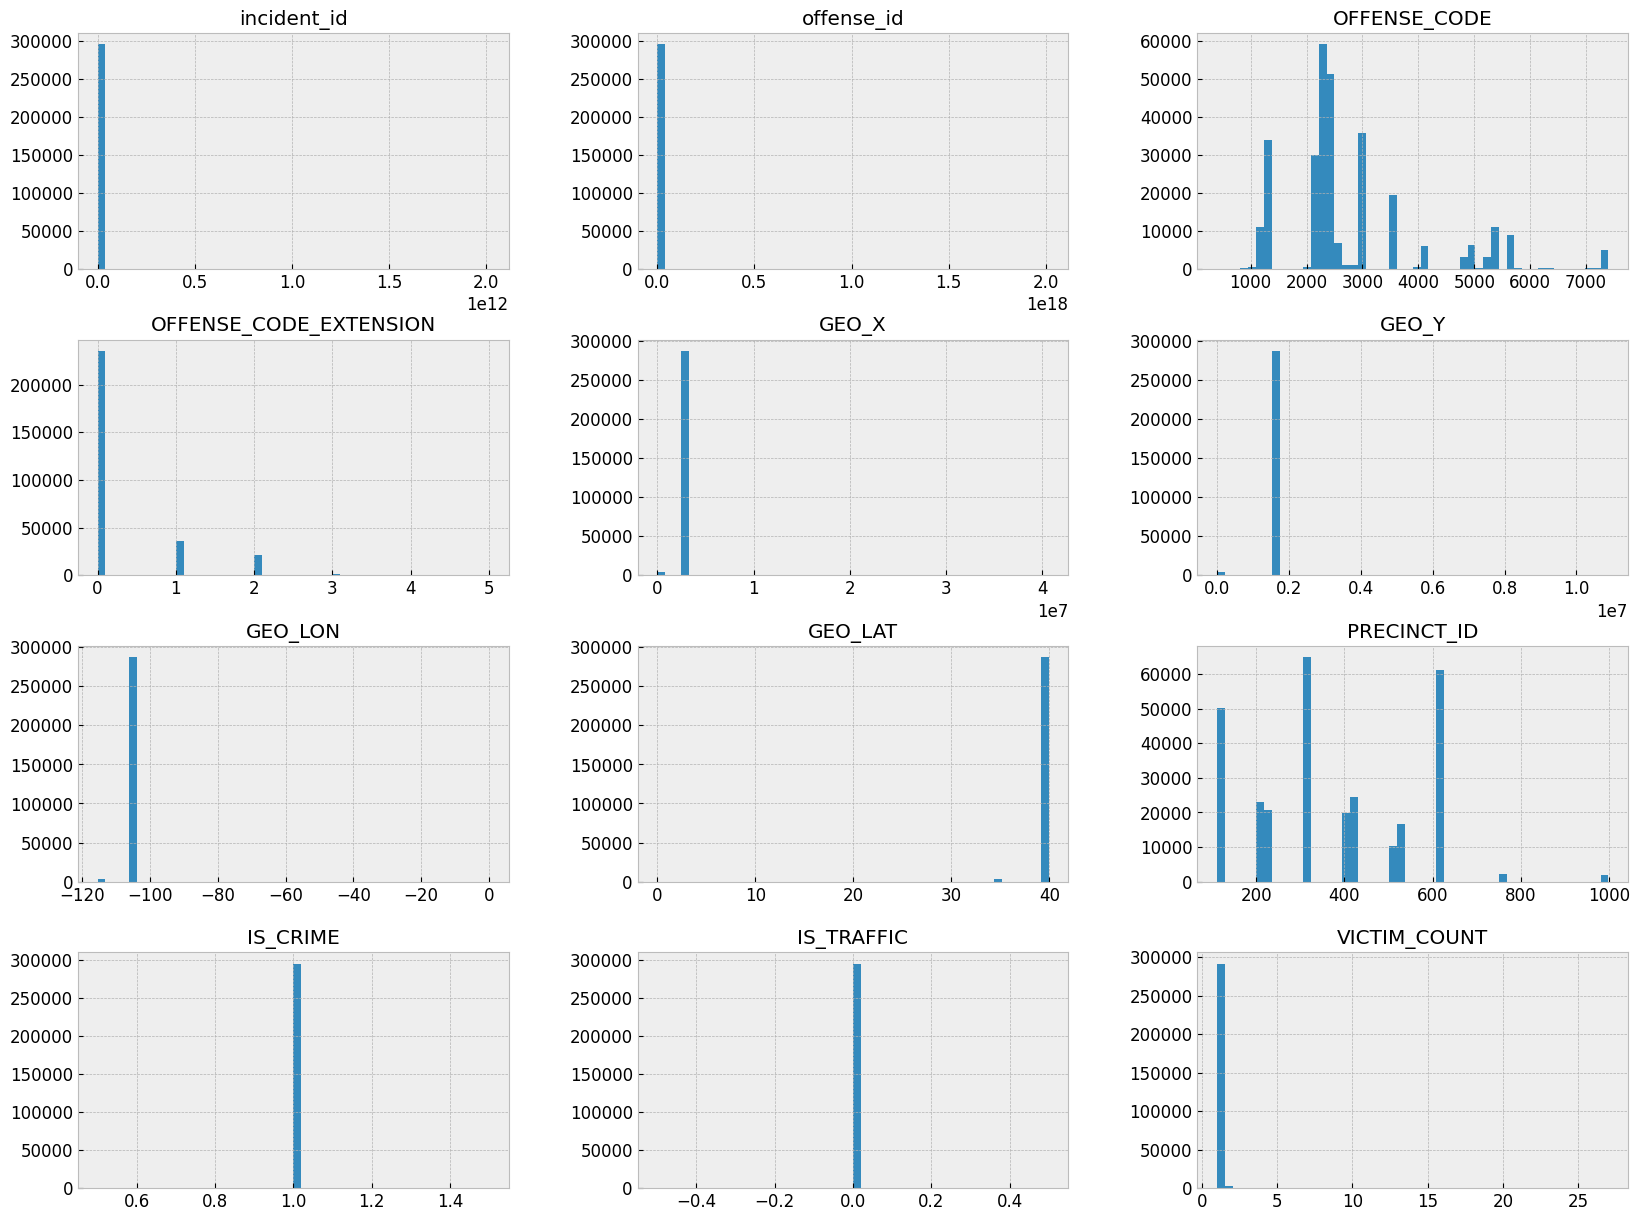

In [59]:
denver_crime_df.hist(figsize=(20,15), bins=50)

array([[<Axes: title={'center': 'STAT_VALUE'}>,
        <Axes: title={'center': 'Row_Value_ID'}>]], dtype=object)

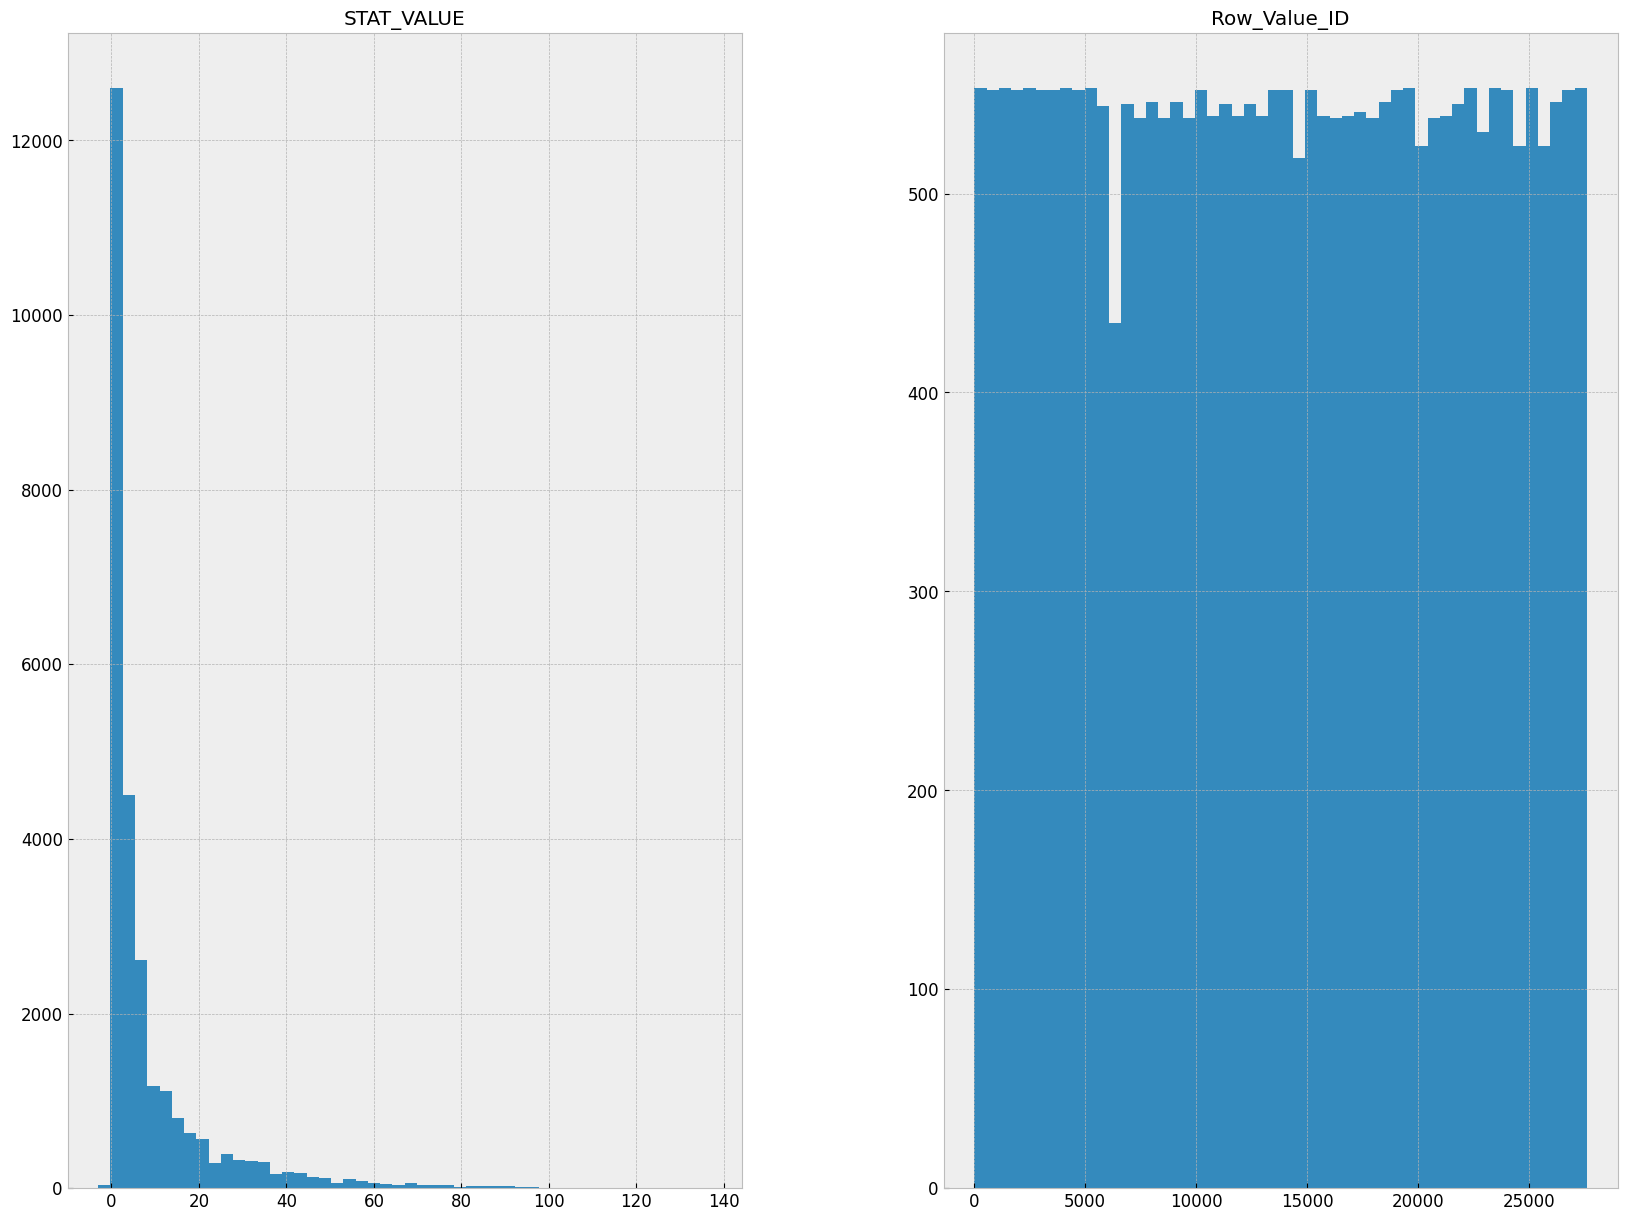

In [60]:
seattle_crime_df.hist(figsize=(20,15), bins=50)

<Axes: >

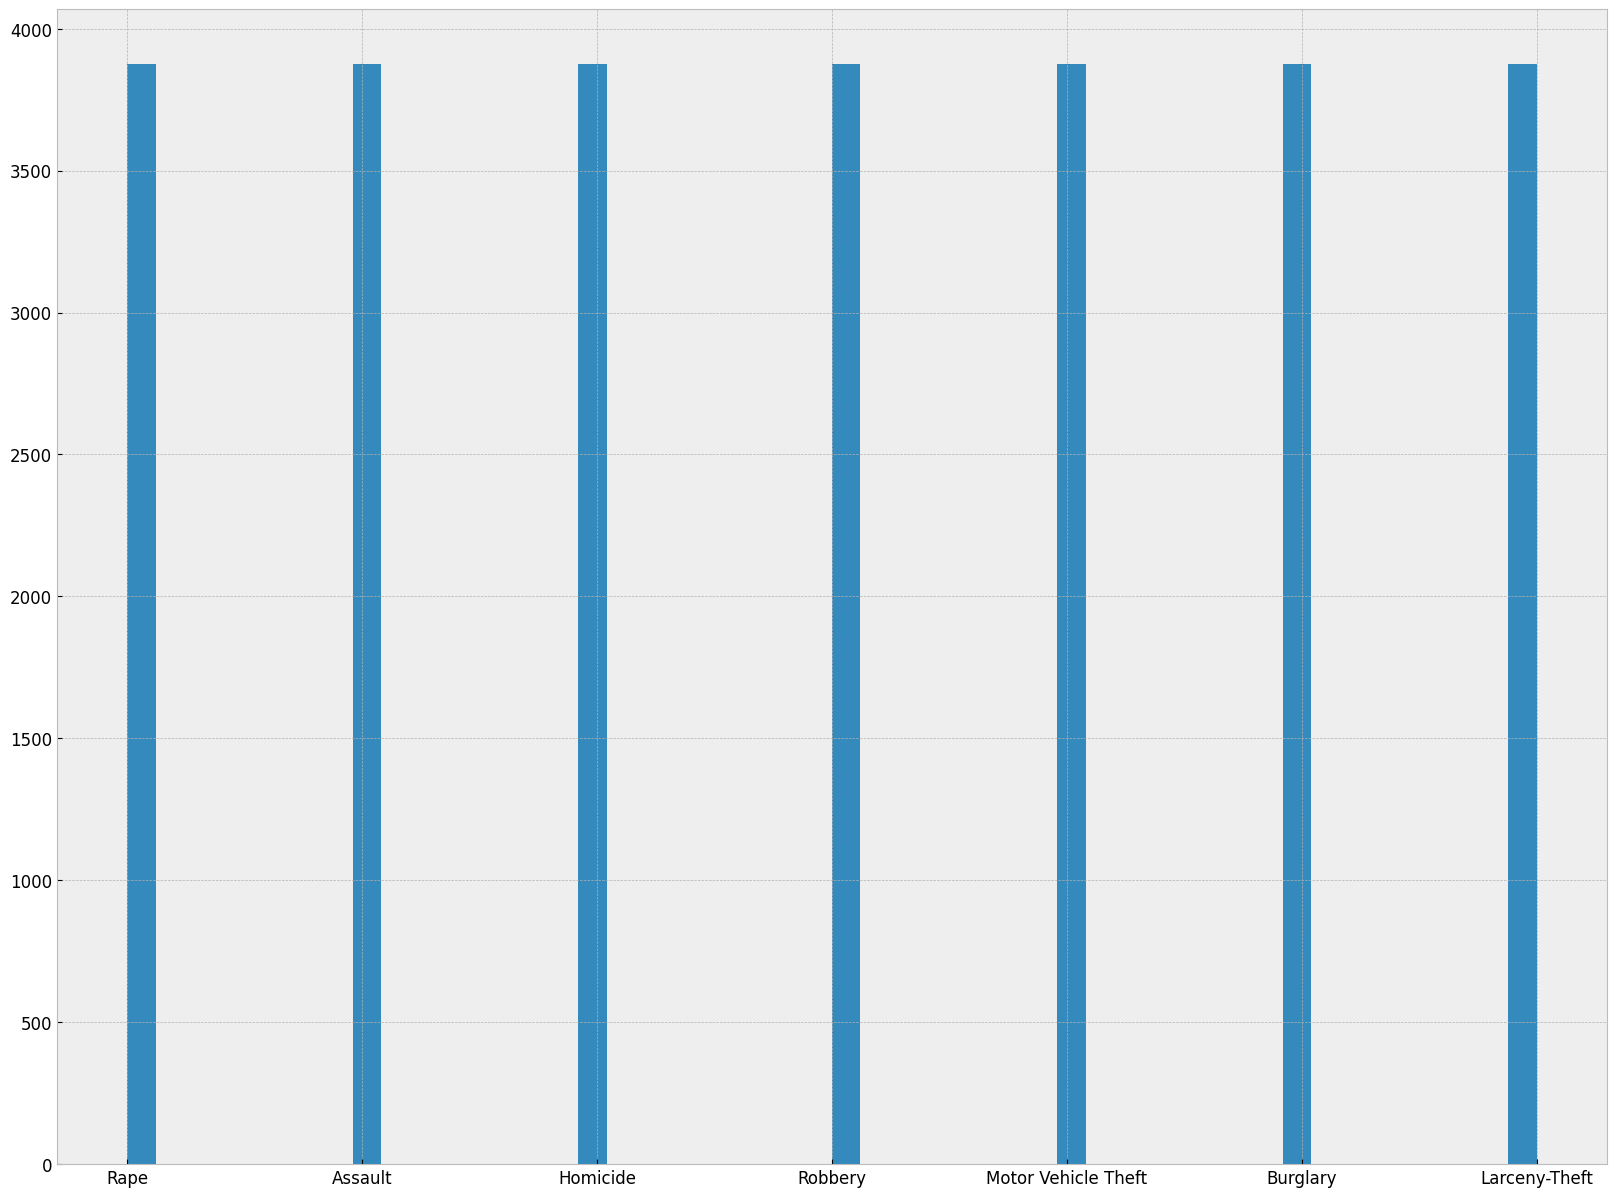

In [61]:
seattle_crime_df['CRIME_TYPE'].hist(figsize=(20,15), bins=50)

In [62]:
denver_crime_df['offense_category_id'].hist(figsize=(20,15), bins=50)

KeyError: 'offense_category_id'

Index(['incident_id', 'offense_id', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'VICTIM_COUNT'],
      dtype='object')

<Axes: ylabel='OFFENSE_CATEGORY_ID'>

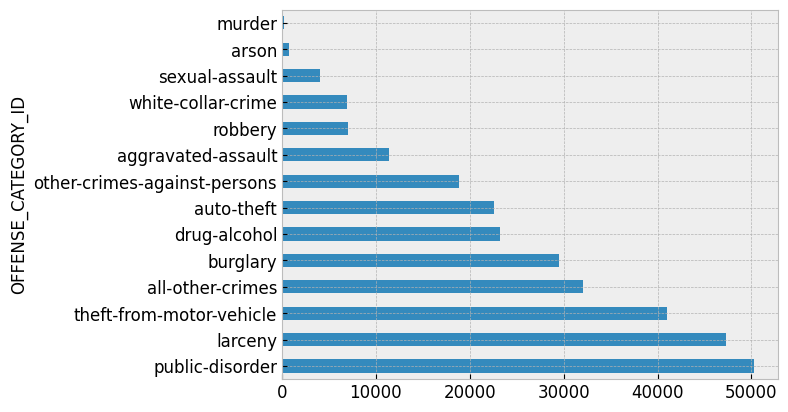

In [ ]:
display(denver_crime_df.columns)

simplified_denver_crime_df = denver_crime_df.drop(['incident_id', 'offense_id', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION','FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE','INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'VICTIM_COUNT'], axis=1)

simplified_denver_crime_df['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='barh')

array([[<Axes: xlabel='STAT_VALUE', ylabel='STAT_VALUE'>,
        <Axes: xlabel='Row_Value_ID', ylabel='STAT_VALUE'>],
       [<Axes: xlabel='STAT_VALUE', ylabel='Row_Value_ID'>,
        <Axes: xlabel='Row_Value_ID', ylabel='Row_Value_ID'>]],
      dtype=object)

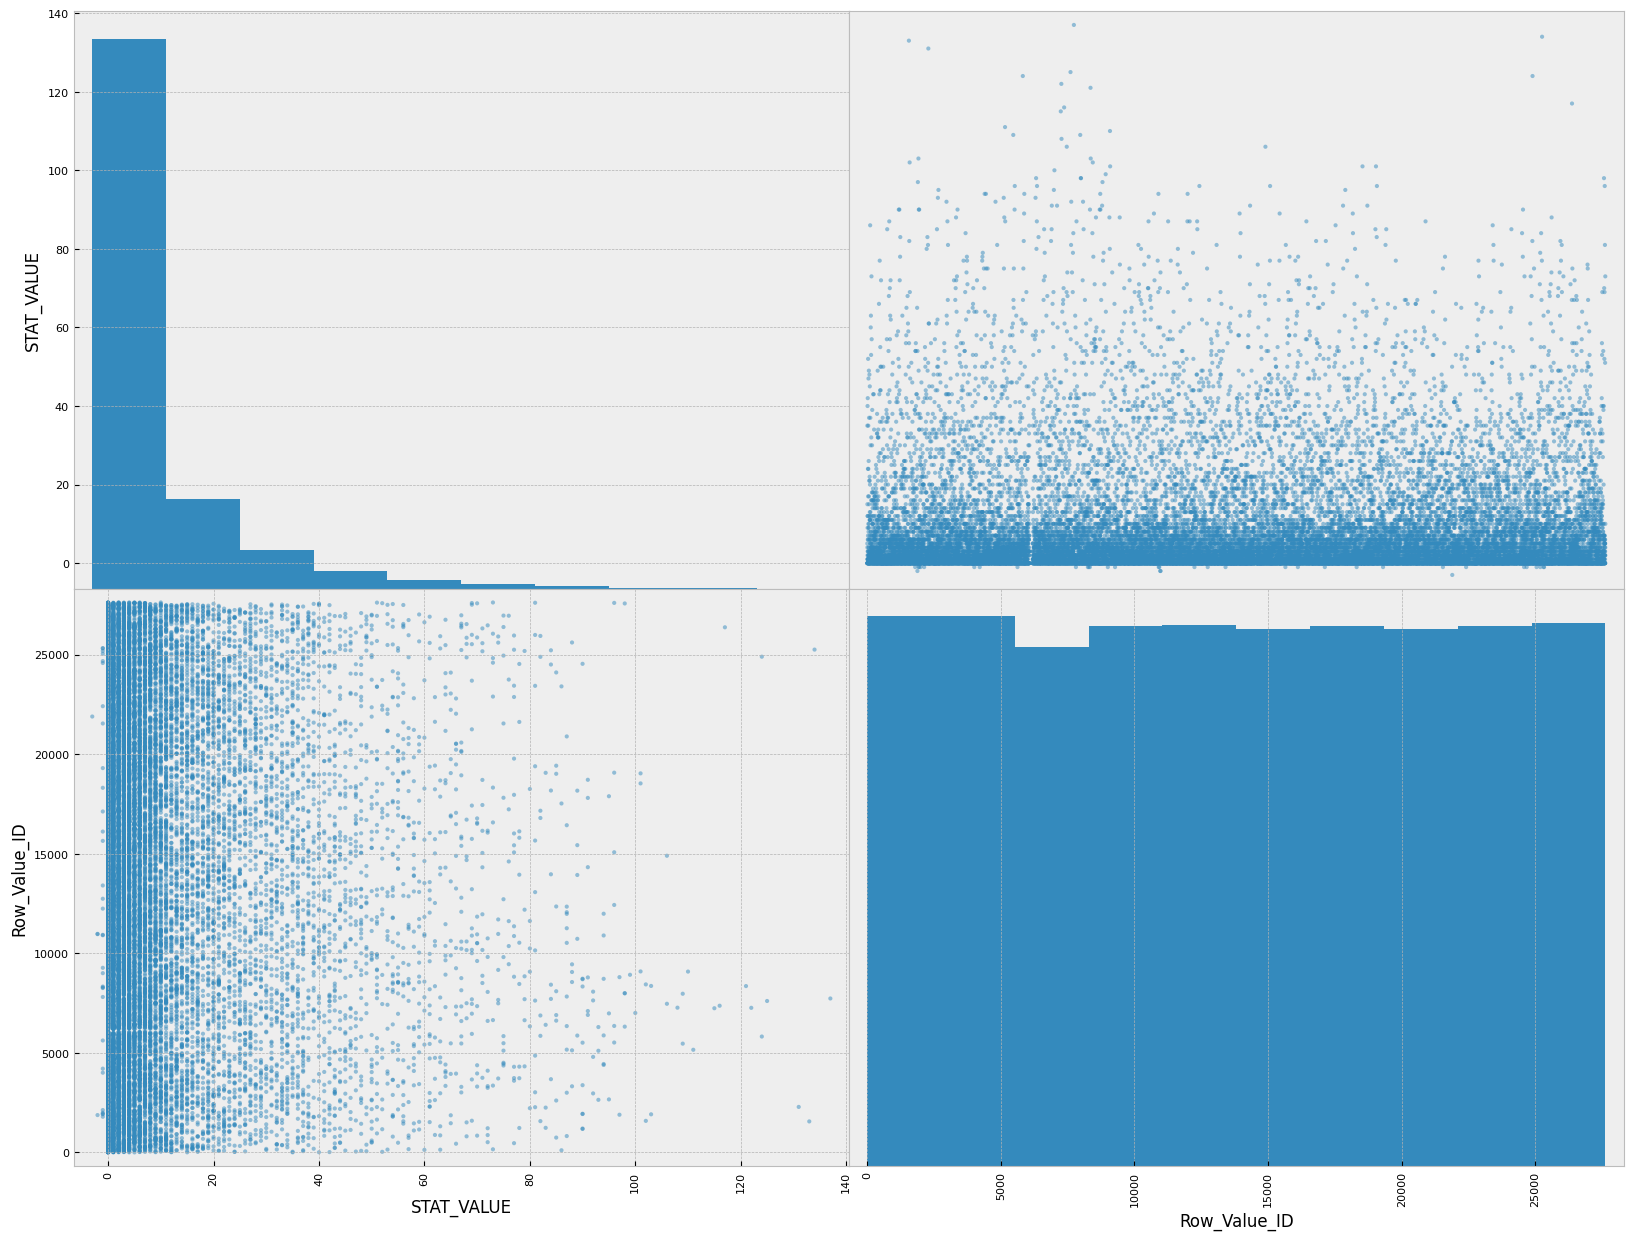

In [ ]:
seattle_scatter_mat = pd.plotting.scatter_matrix(seattle_crime_df, figsize=(20,15))
seattle_scatter_mat

<Axes: ylabel='CRIME_TYPE'>

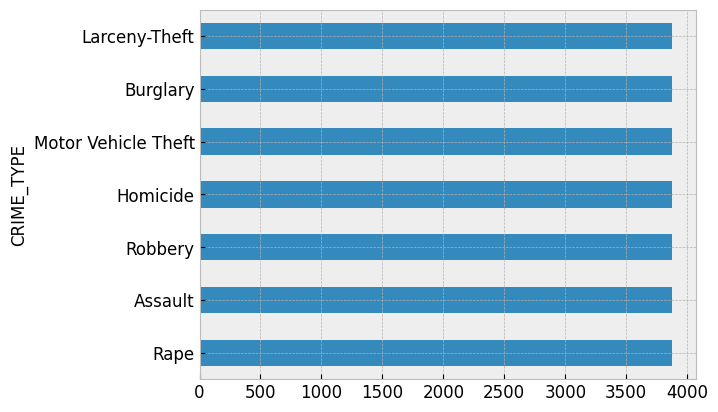

In [ ]:
seattle_crime_df['CRIME_TYPE'].value_counts().plot(kind='barh')

### First Impressions/Conclusions
Scatter Matrixes were not particularly helpful. I see that the primary data I want is the total crime type by year. I will need to eliminate unneeded columns and so some data transformation to make the sets more useful. I have trimmed down known extraneous columns from denver just reduce the load on the data viz libraries. I will refine further during the next phase.

## Machine Learning and Regression
### Data transformation
I will add a column to each dataset exclusively for the year of the offense. This should allow me to observe the rate of change, if any, for each type year over year. The datasets have different categories of crimes that do not necessarily correspond to each other. However, I do not see this necessarily as a hindrance as the real intent is to see if there are any changes in the respective categories.

In [ ]:
# Transform Denver data
simplified_denver_crime_df['reported_datetime'] = pd.to_datetime(simplified_denver_crime_df['REPORTED_DATE'])
simplified_denver_crime_df.head()
simplified_denver_crime_df['YEAR'] = simplified_denver_crime_df['reported_datetime'].dt.year
simplified_denver_crime_df.head()

/var/folders/cd/phnyf8nx3qz3q_40w5wr7jxm0000gn/T/ipykernel_21489/899239539.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  simplified_denver_crime_df['reported_datetime'] = pd.to_datetime(simplified_denver_crime_df['REPORTED_DATE'])


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,reported_datetime,YEAR
0,criminal-mischief-other,public-disorder,9/14/2010 11:03:00 PM,2010-09-14 23:03:00,2010
1,criminal-mischief-other,public-disorder,10/4/2010 1:41:00 PM,2010-10-04 13:41:00,2010
2,criminal-mischief-other,public-disorder,11/8/2010 12:14:00 AM,2010-11-08 00:14:00,2010
3,criminal-mischief-other,public-disorder,10/4/2010 2:47:00 PM,2010-10-04 14:47:00,2010
4,criminal-mischief-other,public-disorder,2/13/2010 4:52:00 AM,2010-02-13 04:52:00,2010


In [65]:
seattle_crime_df['REPORT_DATETIME'] = pd.to_datetime(seattle_crime_df['REPORT_DATE'])
seattle_crime_df.head()
seattle_crime_df['YEAR'] = seattle_crime_df['REPORT_DATETIME'].dt.year
seattle_crime_df.head()

/var/folders/cd/phnyf8nx3qz3q_40w5wr7jxm0000gn/T/ipykernel_21489/2850948777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_crime_df['REPORT_DATETIME'] = pd.to_datetime(seattle_crime_df['REPORT_DATE'])
/var/folders/cd/phnyf8nx3qz3q_40w5wr7jxm0000gn/T/ipykernel_21489/2850948777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_crime_df['YEAR'] = seattle_crime_df['REPORT_DATETIME'].dt.year


,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID,REPORT_DATETIME,YEAR
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092,2014-04-30,2014
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506,2014-04-30,2014
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567,2014-04-30,2014
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225,2014-04-30,2014
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368,2014-04-30,2014


### Remove all superflous columns
Remove unnecessary columns from the datasets to maximize focus on important data.

In [66]:
denver_crime_df_v2 = simplified_denver_crime_df.drop(['OFFENSE_TYPE_ID', 'REPORTED_DATE',
       'reported_datetime'], axis=1)
denver_crime_df_v2.head()

,OFFENSE_CATEGORY_ID,YEAR
0,public-disorder,2010
1,public-disorder,2010
2,public-disorder,2010
3,public-disorder,2010
4,public-disorder,2010


In [67]:
seattle_crime_df_v2 = seattle_crime_df.drop(['Police Beat', 'CRIME_DESCRIPTION', 'STAT_VALUE', 'REPORT_DATE',
                                             'Sector', 'Precinct', 'Row_Value_ID', 'REPORT_DATETIME'] , axis=1)
seattle_crime_df_v2.head()

,CRIME_TYPE,YEAR
0,Rape,2014
1,Assault,2014
2,Homicide,2014
3,Robbery,2014
4,Motor Vehicle Theft,2014


In [68]:
seattle_grouping_and_counts = seattle_crime_df_v2.groupby('YEAR')['CRIME_TYPE'].value_counts()
seattle_grouping_and_counts.plot(x='YEAR', kind='bar', stacked=False, title='Seattle Criminal Incidents by Year', figsize=(150, 75))


<Axes: title={'center': 'Seattle Criminal Incidents by Year'}, xlabel='YEAR,CRIME_TYPE'>

<Axes: title={'center': 'Denver Criminal Incidents by Year'}, xlabel='YEAR,OFFENSE_CATEGORY_ID'>

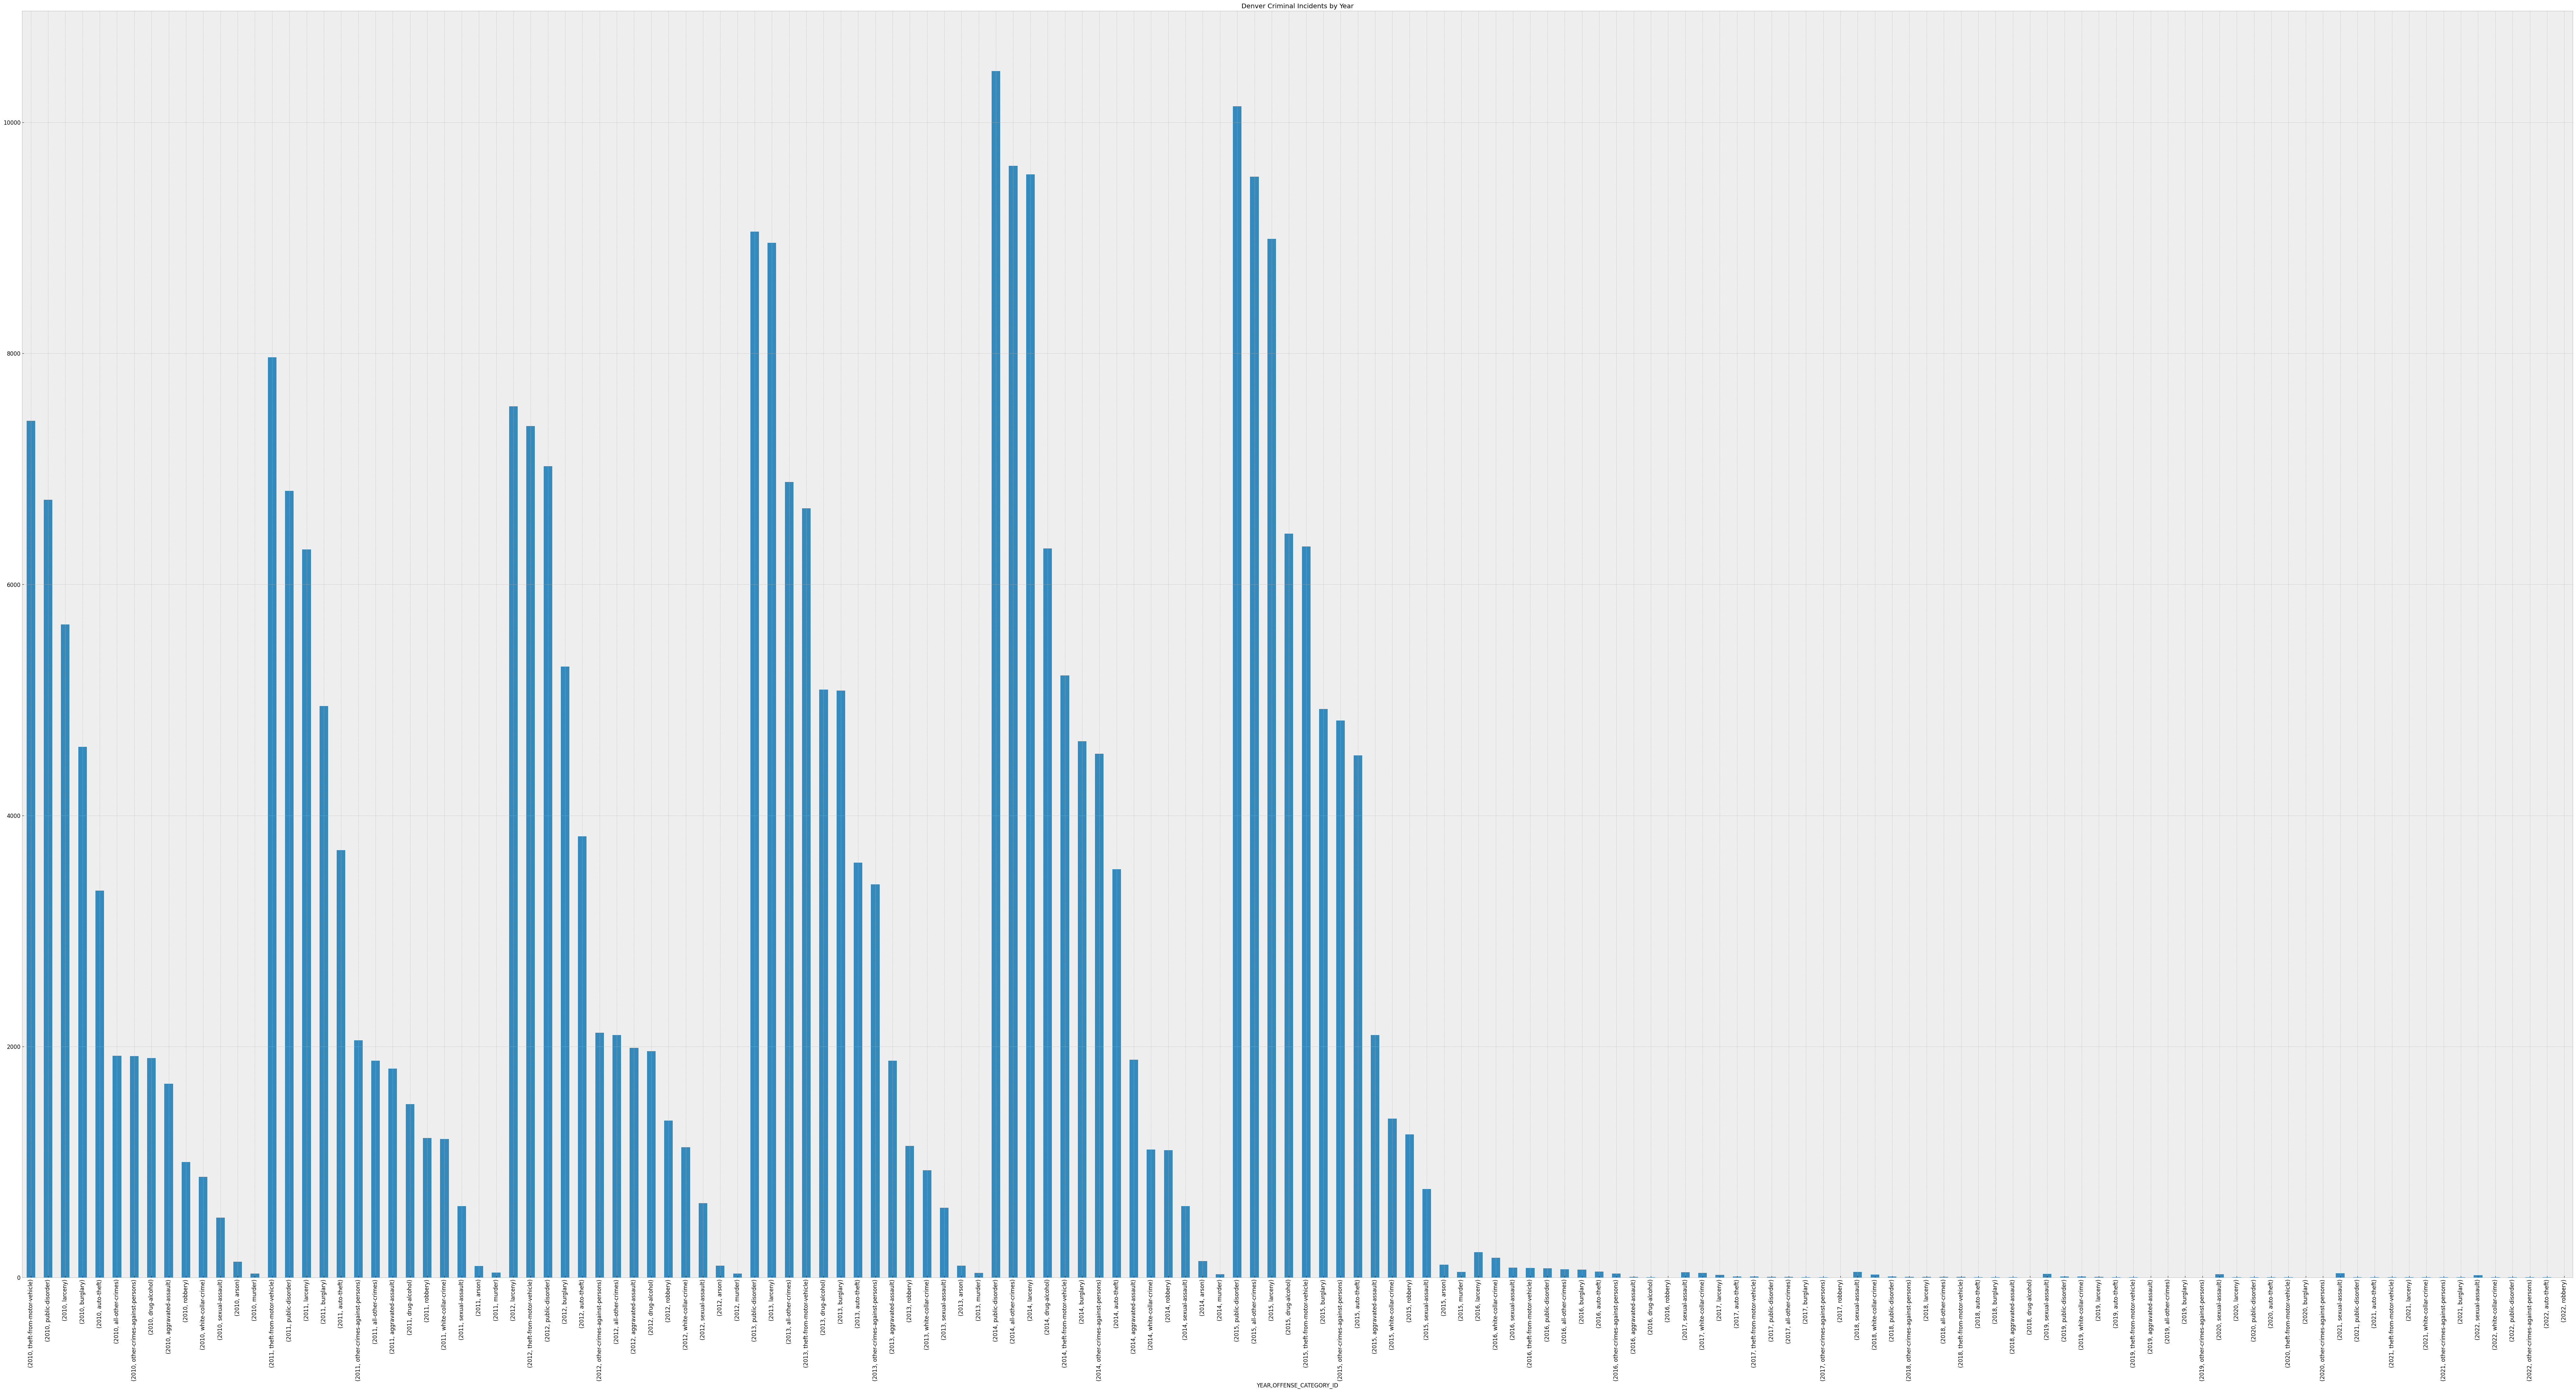

In [69]:
denver_grouping_and_counts = denver_crime_df_v2.groupby('YEAR')['OFFENSE_CATEGORY_ID'].value_counts()
denver_grouping_and_counts.plot(x='year', kind='bar', stacked=False, title='Denver Criminal Incidents by Year', figsize=(100, 50))

## Machine Learning

Split into train and test sets. Given this is for demonstration purposes only. I will limit it to the Denver dataset.



In [71]:
from sklearn.model_selection import train_test_split

# create train/test set
denver_train_set, denver_test_set = train_test_split(denver_crime_df_v2, test_size=0.2, random_state=42)
denver_train_set.head()

,OFFENSE_CATEGORY_ID,YEAR
19308,public-disorder,2015
29166,burglary,2013
11236,drug-alcohol,2013
22833,all-other-crimes,2014
28321,other-crimes-against-persons,2014


## Modeling Data
Using Machine Learning to build a predictive model.

Given the simple nature of the data, I am using a LinearRegression model. Modeling is not really relevant to my project, but I include it to demonstrate using the tools.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# handle the categorical data
denver_categories = denver_train_set[['OFFENSE_CATEGORY_ID']]
one_hot_encoder = OneHotEncoder()
denver_train_categories = one_hot_encoder.fit_transform(denver_categories)
display(denver_train_categories.toarray())
display(one_hot_encoder.categories_)

# Trying to convert the Groupby variable into a dataframe but it doesn't really work. I end up with a single column of count instead of [YEAR, CRIME_TYPE, COUNT]. Not sure how to accomplaish that which has me stuck to this point.



/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[array(['aggravated-assault', 'all-other-crimes', 'arson', 'auto-theft',
        'burglary', 'drug-alcohol', 'larceny', 'murder',
        'other-crimes-against-persons', 'public-disorder', 'robbery',
        'sexual-assault', 'theft-from-motor-vehicle', 'white-collar-crime'],
       dtype=object)]

## Resources and References
*What resources and references have you used for this project?*
I used Kaggle to source the datasets

In [73]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 10081 bytes to source.py
